## Lecture 2 Coding Exercise: Stationarity and Autocorrelation

### Objectives:

- Understand and visualize the components of a time series using decomposition.
- Learn how to test for stationarity and make a time series stationary.
- Understand and interpret autocorrelation and partial autocorrelation plots.


In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import datetime

In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

### 1. Loading and Preparing Data
- Load a real-world time series dataset with trend and seasonality
- Handle any missing values and set the appropriate frequency for the dataset

In [23]:
## Write Code Here ##

#### Ploting the time searies

In [ ]:
## Write Code Here ##

### 2. Time Series Decomposition

 **Decompose a time series dataset** to understand its components
   - Use `seasonal_decompose()` to decompose the series into trend, seasonal, and residual components
   - Compare with LOESS decomposition to understand differences in flexibility
   - Adjust the peried ans season parameters to achive best fit
   - Visualize each component using separate plots

In [24]:
## Write Code Here ##

### 3. Identifying Outliers using Decomposition (Optional)
- Use the decomposed components from the STL decomposition to identify outliers or anomalies in the time series
- Hint: check if their values exceed a specified statistic threshold
- Visualize the residuals and look for significant spikes that could indicate outliers   

In [25]:
## Write Code Here ##


### 4. Testing for Stationarity

####  **Determine if the time series is stationary** using statistical tests.
   - Use the ADF and KPSS tests to determine if the time series is stationary.
   - Visualize the time series to observe any trends or seasonality.

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

In [ ]:
## Write Code Here ##

### 5. Achieving Stationarity

#### **Transform the time series** to achieve stationarity.
   - Apply a moving average, log transformation, and differencing.
   - Visualize each transformation to observe their impact.

##### Apply moving average
- Experiment with different window sizes for moving averages and observe their impact
- Use centered / non-centerec rolling window

In [26]:
## Write Code Here ##

##### Apply log transformation

In [27]:
## Write Code Here ##

##### Apply differencing
- Consider second order differencing or seasonal differencing if necessary

In [28]:
## Write Code Here ##

### 6. Autocorrelation and Partial Autocorrelation

#### **Explore and interpret ACF and PACF** to understand the correlation structure of the time series.

   - Use `plot_acf()` and `plot_pacf()` to visualize autocorrelation patterns for both original and transformed series.
   - Explore implications for AR or MA model identification.


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

##### Original Monthly Electricity Production data

In [30]:
## Write Code Here ##

##### Differenced data

In [31]:
## Write Code Here ##

##### Seasonal differenced data

In [32]:
## Write Code Here ##

## Lecture 2 Coding Exercise: Example Solutions

### Objectives:
- Understand and visualize the components of a time series using decomposition.
- Learn how to test for stationarity and make a time series stationary.
- Understand and interpret autocorrelation and partial autocorrelation plots.


In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import datetime

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

### 1. Loading and Preparing Data
- Load a real-world time series dataset with trend and seasonality
- Handle any missing values and set the appropriate frequency for the dataset

Num missing values E_Production    0
dtype: int64
            E_Production
DATE                    
1985-01-01       71.5943
1985-02-01       69.7893
1985-03-01       61.6809
1985-04-01       56.7497
1985-05-01       54.6182


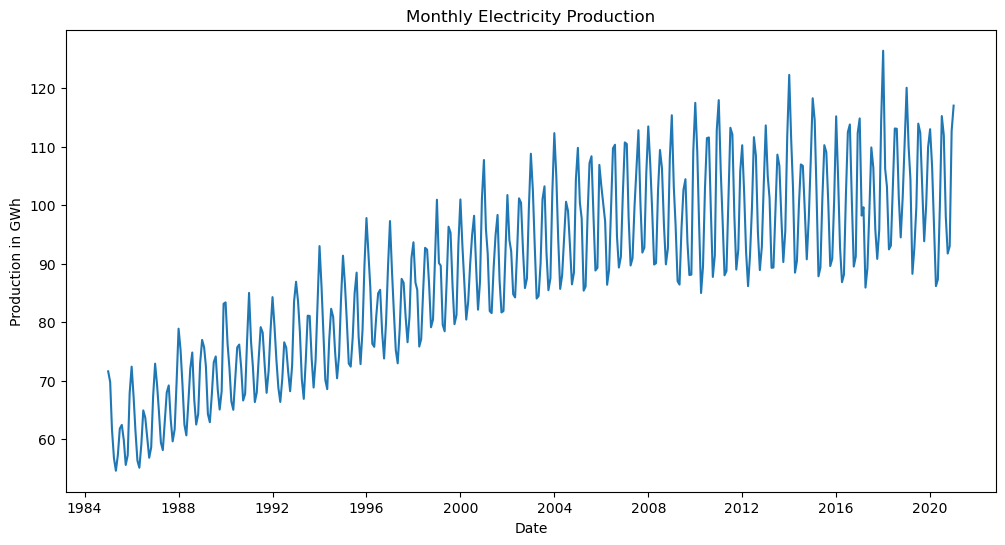

In [3]:
# Load Electricity Production dataset from FRED (Federal Reserve Economic Data)
start = datetime.datetime(1985, 1, 1)
end = datetime.datetime(2021, 1, 1)
electricity_df = web.DataReader('IPG2211A2N', 'fred', start, end)

# Rename column for better readability
electricity_df.rename(columns={'IPG2211A2N': 'E_Production'}, inplace=True)

# Count missing values
print('Num missing values',electricity_df.isnull().sum())

# Set frequency to monthly
electricity_df.index.freq = 'MS'

print(electricity_df.head())

# plot the data
plt.figure(figsize=(12, 6))
plt.plot(electricity_df)
plt.title('Monthly Electricity Production')
# set x-axis label
plt.xlabel('Date')
# set y-axis label
plt.ylabel('Production in GWh')
plt.show()


#### Ploting the time searies

### 2. Time Series Decomposition

 **Decompose a time series dataset** to understand its components
   - Use `seasonal_decompose()` to decompose the series into trend, seasonal, and residual components
   - Compare with LOESS decomposition to understand differences in flexibility
   - Adjust the peried ans season parameters to achive best fit
   - Visualize each component using separate plots

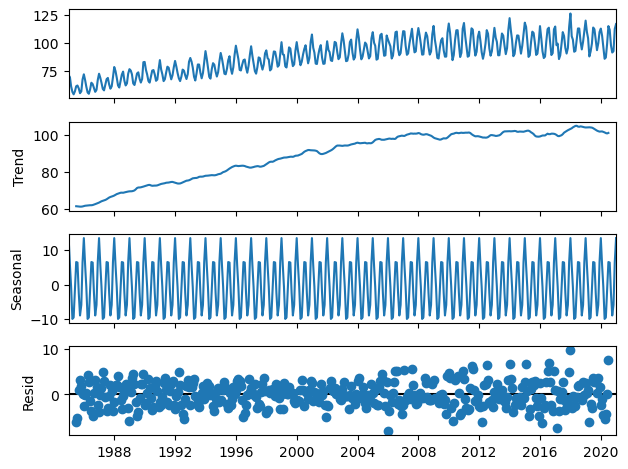

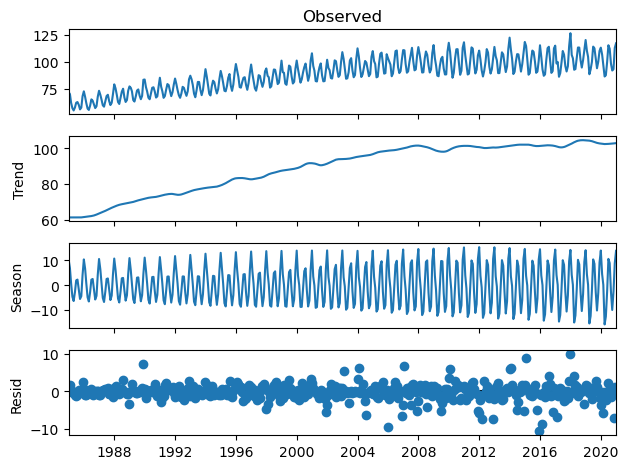

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL

# Decompose time series using seasonal_decompose
decomposition = seasonal_decompose(electricity_df, model='additive', period=12)
decomposition.plot()
plt.show()

# Decompose time series using STL (LOESS-based decomposition)
stl = STL(electricity_df, robust=True, seasonal=13)
stl_result = stl.fit()
stl_result.plot()
plt.show()

### 3. Identifying Outliers using Decomposition (Optional)
- Use the decomposed components from the STL decomposition to identify outliers or anomalies in the time series
- Hint: check if their values exceed a specified statistic threshold
- Visualize the residuals and look for significant spikes that could indicate outliers   

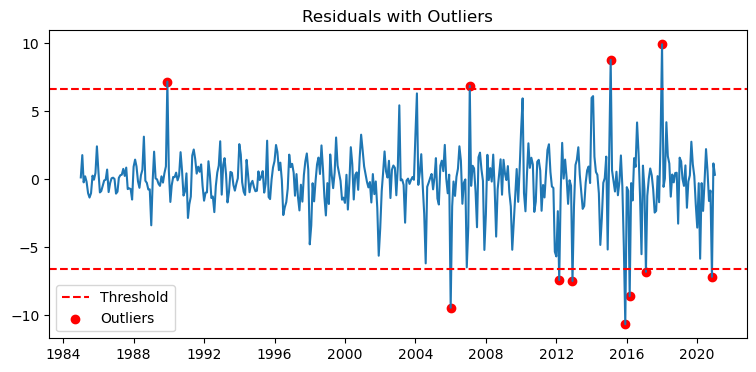

In [5]:
# Identify potential outliers based on residuals
threshold = 3 * stl_result.resid.std() # set threshold to 3 times the standard deviation

# get oiginal minus the trend


outliers_residuals = stl_result.resid[abs(stl_result.resid) > threshold] # identify outliers

# Plot the treshold and outliers on top of the residuals
plt.figure(figsize=(9, 4))
plt.plot(stl_result.resid)
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.axhline(y=-threshold, color='r', linestyle='--')
plt.scatter(outliers_residuals.index, outliers_residuals, color='r', label='Outliers')
plt.title('Residuals with Outliers')
plt.legend()
plt.show()


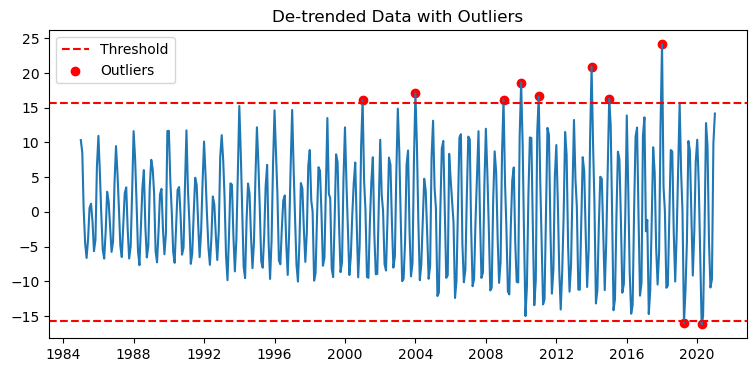

In [6]:
# Identify potential outliers based on de-trended data
trend = stl_result.trend
de_trended = electricity_df['E_Production'] - trend

threshold = 2 * de_trended.std() # set threshold to 3 times the standard deviation

outliers_detrend = de_trended[abs(de_trended) > threshold] # identify outliers

# Plot the treshold and outliers on top of the residuals
plt.figure(figsize=(9, 4))
plt.plot(de_trended)
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.axhline(y=-threshold, color='r', linestyle='--')
plt.scatter(outliers_detrend.index, outliers_detrend, color='r', label='Outliers')
plt.title('De-trended Data with Outliers')
plt.legend()
plt.show()

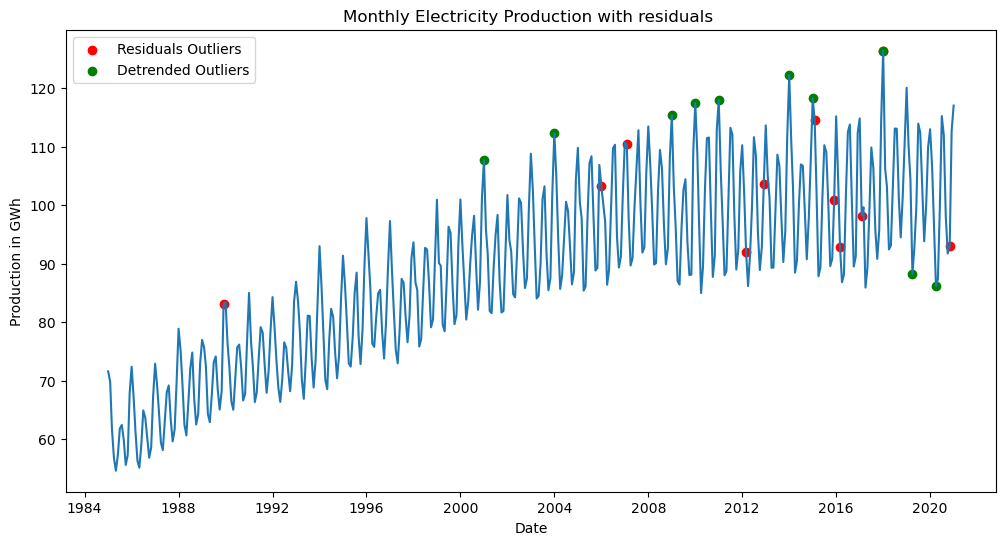

In [8]:
# plot the outliers on top of the original time series
plt.figure(figsize=(12, 6))
plt.plot(electricity_df)
plt.scatter(outliers_residuals.index, electricity_df.loc[outliers_residuals.index], color='r', label='Residuals Outliers')
plt.scatter(outliers_detrend.index, electricity_df.loc[outliers_detrend.index], color='g', label='Detrended Outliers')
plt.title('Monthly Electricity Production with residuals ')
plt.xlabel('Date')
plt.ylabel('Production in GWh')
plt.legend()

### 4. Testing for Stationarity

####  **Determine if the time series is stationary** using statistical tests.
   - Use the ADF and KPSS tests to determine if the time series is stationary.
   - Visualize the time series to observe any trends or seasonality.

In [9]:
from statsmodels.tsa.stattools import adfuller, kpss

In [10]:
def perform_stationarity_test(df, column, test_type='ADF'):
    """
    Perform ADF or KPSS stationarity test on a specified column of a DataFrame.
    - test_type: Type of test to perform ('ADF' or 'KPSS').
    """
    if test_type == 'ADF':
        result = adfuller(df[column])
        print('ADF Statistic:', result[0])
        print('p-value:', result[1])
        if result[1] < 0.05:
            print('Time Series is stationary')
        else:
            print('Time Series is not stationary')
    elif test_type == 'KPSS':
        result = kpss(df[column], nlags='auto')
        print('KPSS Statistic:', result[0])
        print('p-value:', result[1])
        if result[1] > 0.05:
            print('Time Series is stationary')
        else:
            print('Time Series is not stationary')
    else:
        print('Invalid test type specified. Choose either "ADF" or "KPSS".')

In [11]:
perform_stationarity_test(electricity_df, 'E_Production', test_type='ADF')

ADF Statistic: -2.630203770926606
p-value: 0.08691404283652338
Time Series is not stationary


### 5. Achieving Stationarity

#### **Transform the time series** to achieve stationarity.
   - Apply a moving average, log transformation, and differencing.
   - Visualize each transformation to observe their impact.

##### Apply moving average
- Experiment with different window sizes for moving averages and observe their impact
- Use centered / non-centerec rolling window

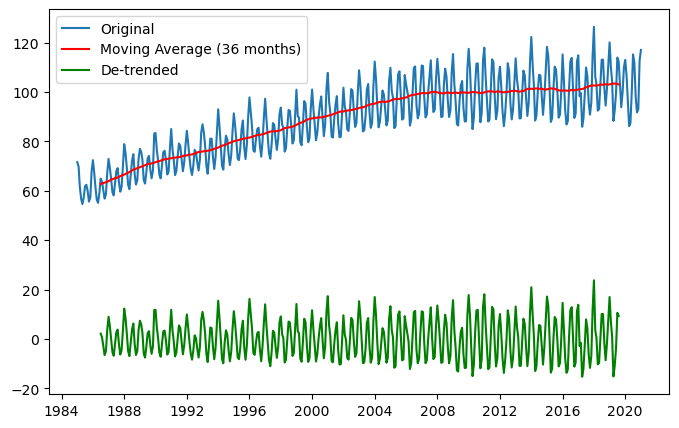

ADF Statistic: -7.293370522052476
p-value: 1.3983091084994449e-10
Time Series is stationary


In [12]:
moving_avg = electricity_df['E_Production'].rolling(window=36, center=True).mean()
de_trended = electricity_df['E_Production'] - moving_avg

plt.figure(figsize=(8, 5))
plt.plot(electricity_df.index, electricity_df['E_Production'], label='Original')
plt.plot(electricity_df.index, moving_avg, label='Moving Average (36 months)', color='red')
plt.plot(electricity_df.index, de_trended, label='De-trended', color='green')
plt.legend()
plt.show()

perform_stationarity_test(de_trended.dropna().to_frame(), 'E_Production', test_type='ADF')

##### Apply log transformation

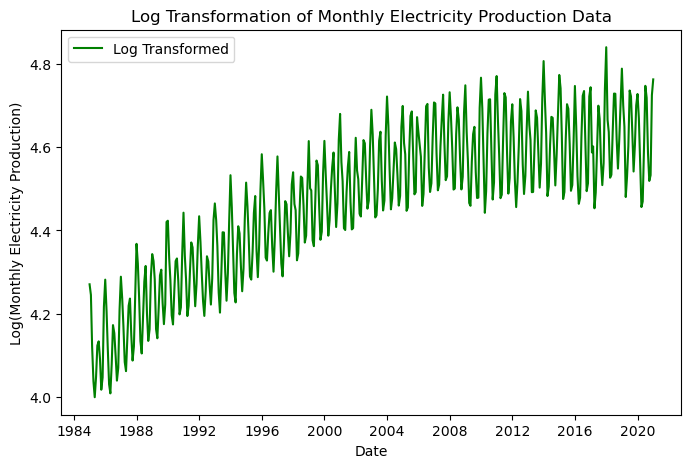

ADF Statistic: -3.425997629753573
p-value: 0.010103903374894146
Time Series is stationary


KPSS Statistic: 3.350068298445483
p-value: 0.01
Time Series is not stationary


In [13]:
log_transformed = np.log(electricity_df['E_Production'])

plt.figure(figsize=(8, 5))
plt.plot(electricity_df.index, log_transformed, label='Log Transformed', color='green')
plt.xlabel('Date')
plt.ylabel('Log(Monthly Electricity Production)')
plt.title('Log Transformation of Monthly Electricity Production Data')
plt.legend()
plt.show()

perform_stationarity_test(log_transformed.dropna().to_frame(), 'E_Production', test_type='ADF')
print('\n')
perform_stationarity_test(log_transformed.dropna().to_frame(), 'E_Production', test_type='KPSS')

##### Apply differencing

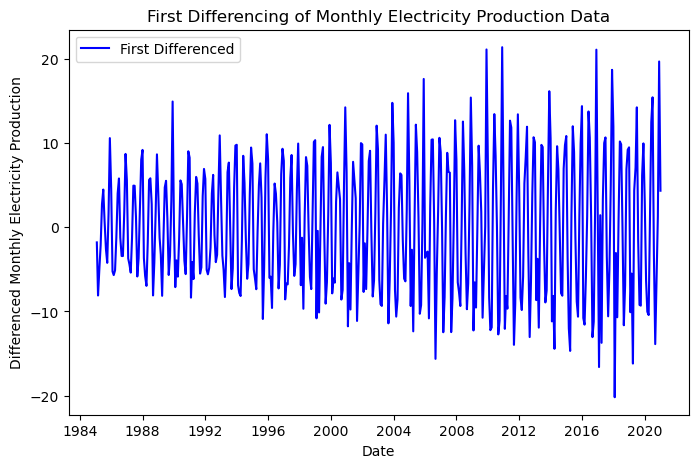

ADF Statistic: -7.383810852714099
p-value: 8.337957845871593e-11
Time Series is stationary


In [14]:
differenced = electricity_df['E_Production'].diff().dropna()
differenced2= electricity_df['E_Production'].diff().diff().dropna()

plt.figure(figsize=(8, 5))
plt.plot(differenced.index, differenced, label='First Differenced', color='blue')
#plt.plot(differenced2.index, differenced2, label='Second Differenced', color='red')
plt.xlabel('Date')
plt.ylabel('Differenced Monthly Electricity Production')
plt.title('First Differencing of Monthly Electricity Production Data')
plt.legend()
plt.show()

perform_stationarity_test(differenced.to_frame(), 'E_Production', test_type='ADF')

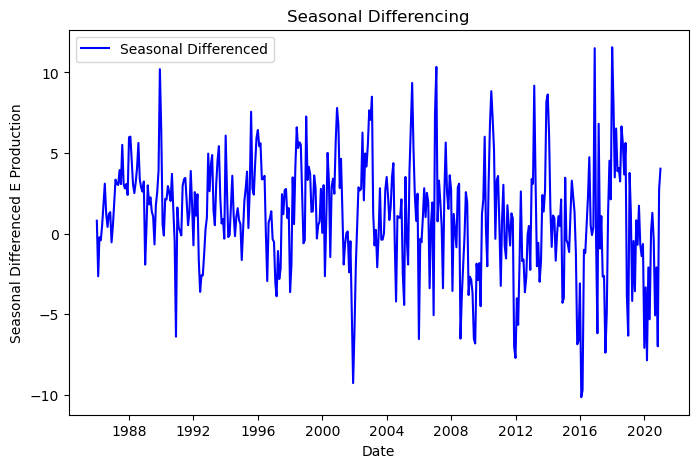

ADF Statistic: -5.9009367892993865
p-value: 2.7791695813913725e-07
Time Series is stationary


In [15]:
##### Apply seasonal differencing
seasonal_differenced = electricity_df['E_Production'].diff(12).dropna()

plt.figure(figsize=(8, 5))
plt.plot(seasonal_differenced.index, seasonal_differenced, label='Seasonal Differenced', color='blue')
plt.xlabel('Date')
plt.ylabel('Seasonal Differenced E Production')
plt.title('Seasonal Differencing')
plt.legend()
plt.show()

perform_stationarity_test(seasonal_differenced.to_frame(), 'E_Production', test_type='ADF')

### 6. Autocorrelation and Partial Autocorrelation

#### **Explore and interpret ACF and PACF** to understand the correlation structure of the time series.

   - Use `plot_acf()` and `plot_pacf()` to visualize autocorrelation patterns for both original and transformed series.
   - Explore implications for AR or MA model identification.


In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

##### Original Monthly Electricity Production data

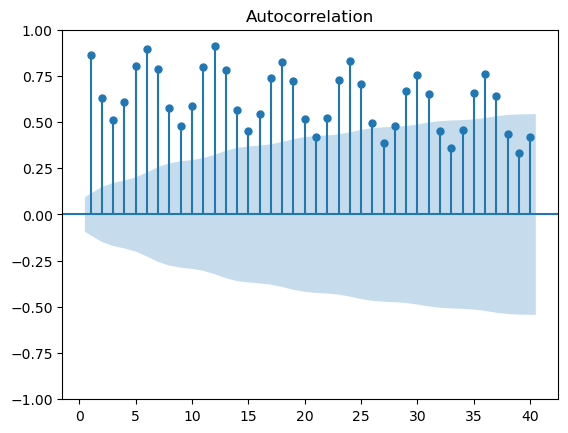

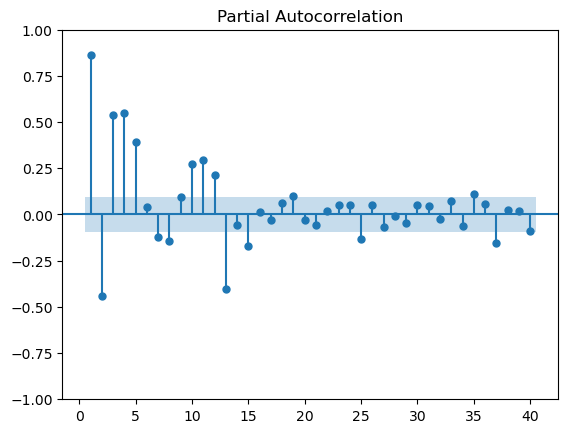

In [17]:
# Plot ACF and PACF for the original data
plot_acf(electricity_df['E_Production'], lags=40, zero=False)
plt.show()

plot_pacf(electricity_df['E_Production'], lags=40, zero=False)
plt.show()

##### Differenced data

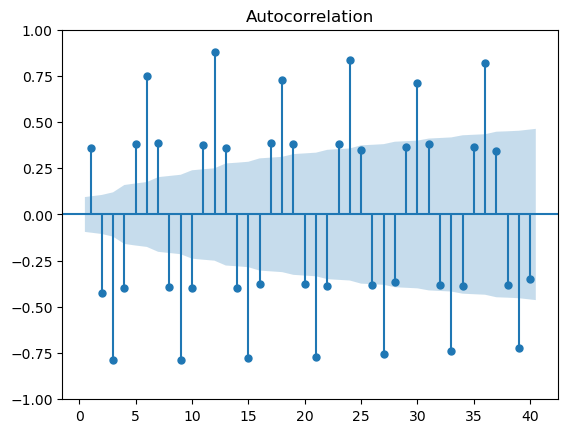

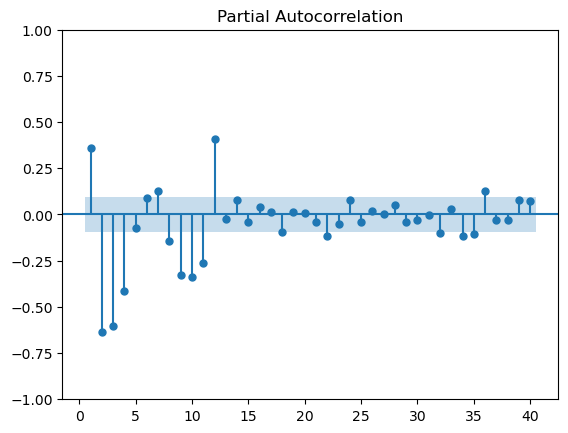

In [21]:
# Plot ACF and PACF for differenced data
plot_acf(differenced, lags=40, zero=False)
plt.show()

plot_pacf(differenced, lags=40, zero=False) 
plt.show()

##### Seasonal differenced data

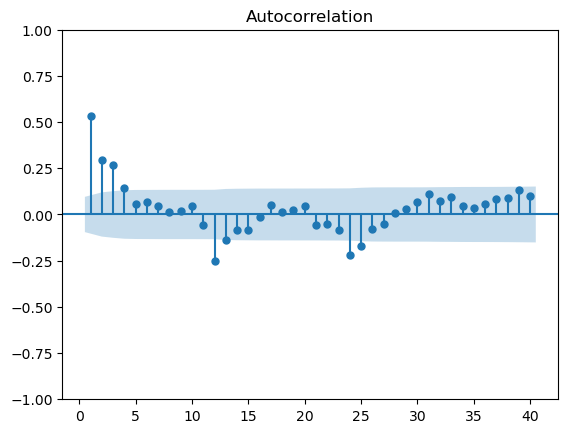

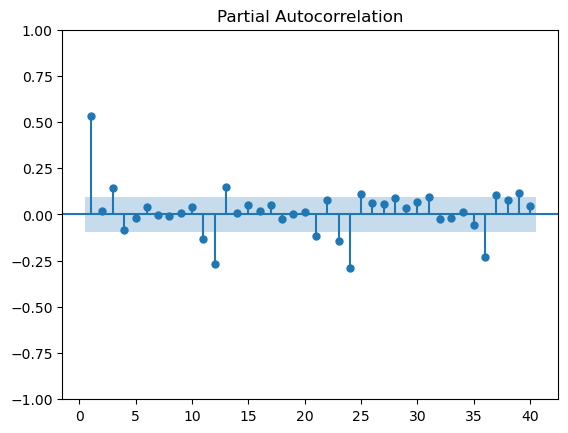

In [22]:
# Plot ACF and PACF for seasonal differenced data
plot_acf(seasonal_differenced, lags=40, zero=False)
plot_pacf(seasonal_differenced, lags=40, zero=False)
plt.show()
